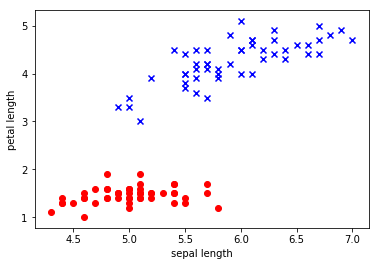

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Perceptron(object):
    
    def __init__(self, eta=110.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) 
                
            self.errors_.append(errors)
            
        return self   
    
    def net_input(self, X):
        # calculates the vector dot product (w.T , X)
        return np.dot(X, self.w_[1:]) + self.w_[0]
                
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
                
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

X = df.iloc[:100, [0, 2]].values
y = df.iloc[:100, 4].values

y = np.where(y == 'Iris-setosa', -1, 1)

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

[ 0.  0.  0.]


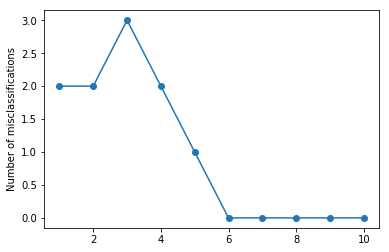

In [2]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.ylabel('Number of misclassifications')
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.show()

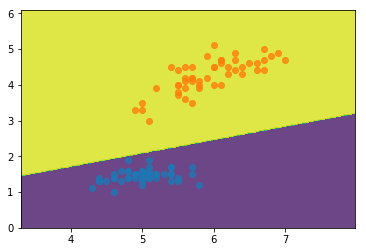

In [166]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.8)
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,
                     label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.show()